In [1]:
import get_data as gdd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as pe
import os
import numpy as np

/Users/tara/Documents/SJSU/2023Fall/CS_122/Project/cs122-project/get_data.py:63: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 63 of the file /Users/tara/Documents/SJSU/2023Fall/CS_122/Project/cs122-project/get_data.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup=BeautifulSoup(content)


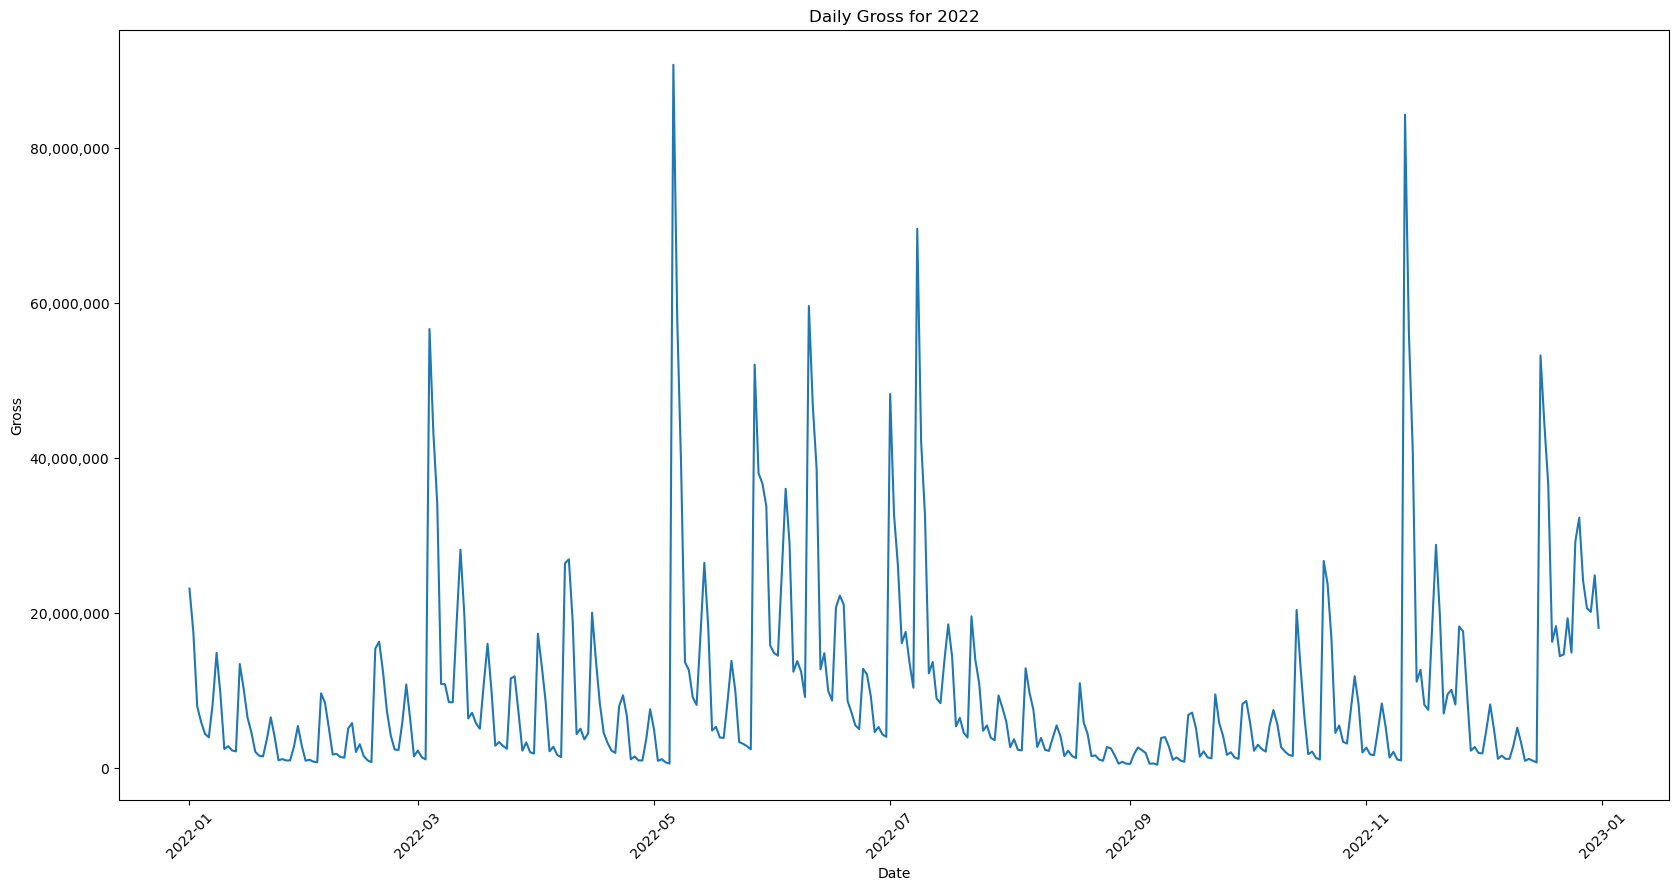

In [2]:
# Specify a year and get back a dataframe with daily data
# timeseries will be stored as daily_gross.png
year = '2022'
df = gdd.get_daily_data_for_year(year)
gdd.plot_daily_data_by_year(df, year)

c:\Users\EzraHsieh\Documents\SJSU\CS_122\Project\cs122-project\get_data.py:16: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 16 of the file c:\Users\EzraHsieh\Documents\SJSU\CS_122\Project\cs122-project\get_data.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup=BeautifulSoup(content)


                  Date Occasion  Top10Gross PercentChangeTop10  OverallGross  \
0   Dec 30-Jan 5, 2023            174584090             -27.9%     176585127   
1            Dec 23-29            242130042                +4%     246487640   
2            Dec 16-22            232765223            +414.8%     236324722   
3             Dec 9-15             45214764               -31%      51441972   
4              Dec 2-8             65533485             -39.4%      71808894   
5         Nov 25-Dec 1            108155850             -31.7%     114262463   
6            Nov 18-24            158366183             -37.4%     166806980   
7            Nov 11-17            252999294              +255%     256405792   
8             Nov 4-10             71262866             -17.4%      78067175   
9         Oct 28-Nov 3             86294773             -39.4%      91912422   
10           Oct 21-27            142445560             +56.8%     147141895   
11           Oct 14-20             90872

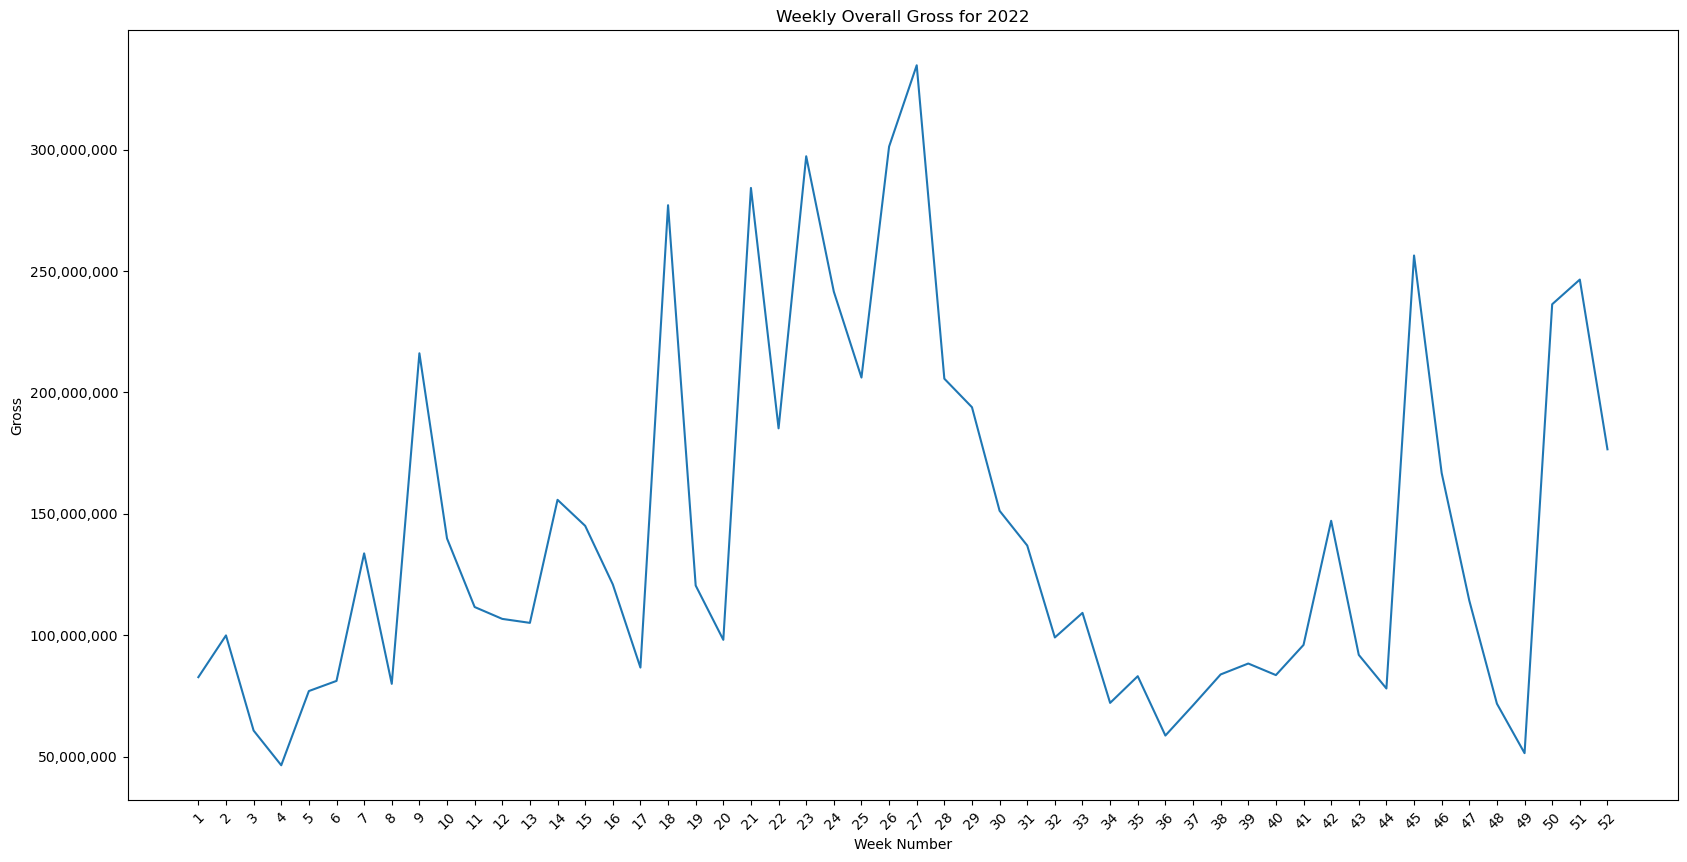

In [5]:
# Specify a year and get back a dataframe with daily data
# timeseries will be stored as daily_gross.png
year = '2022'
df = gdd.get_weekly_data_for_year(year)
print(df)
gdd.plot_weekly_data_by_year(df, year)

### ugly graph

In [32]:
year = '2022'
df = gdd.get_weekly_data_for_year(year)

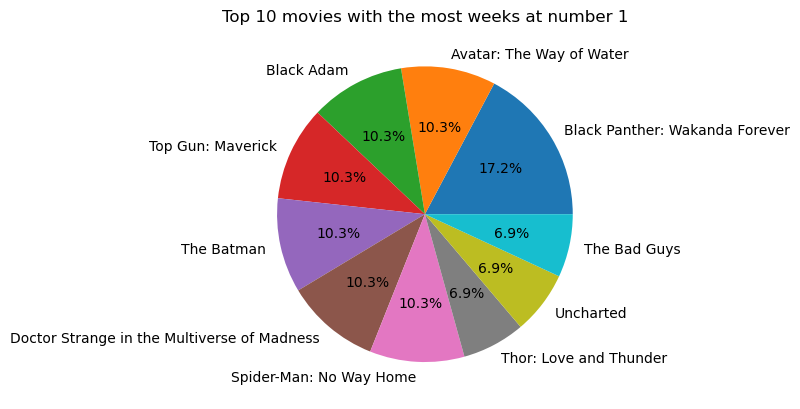

In [33]:
# create a pie chart
import matplotlib.pyplot as plt

# Step 1 & 2
top_10_movies = df['Number1Release'].value_counts().head(10)

# Step 3, 4 & 5
plt.pie(top_10_movies, labels = top_10_movies.index, autopct='%1.1f%%')
plt.title('Top 10 movies with the most weeks at number 1')
plt.show()

### progress

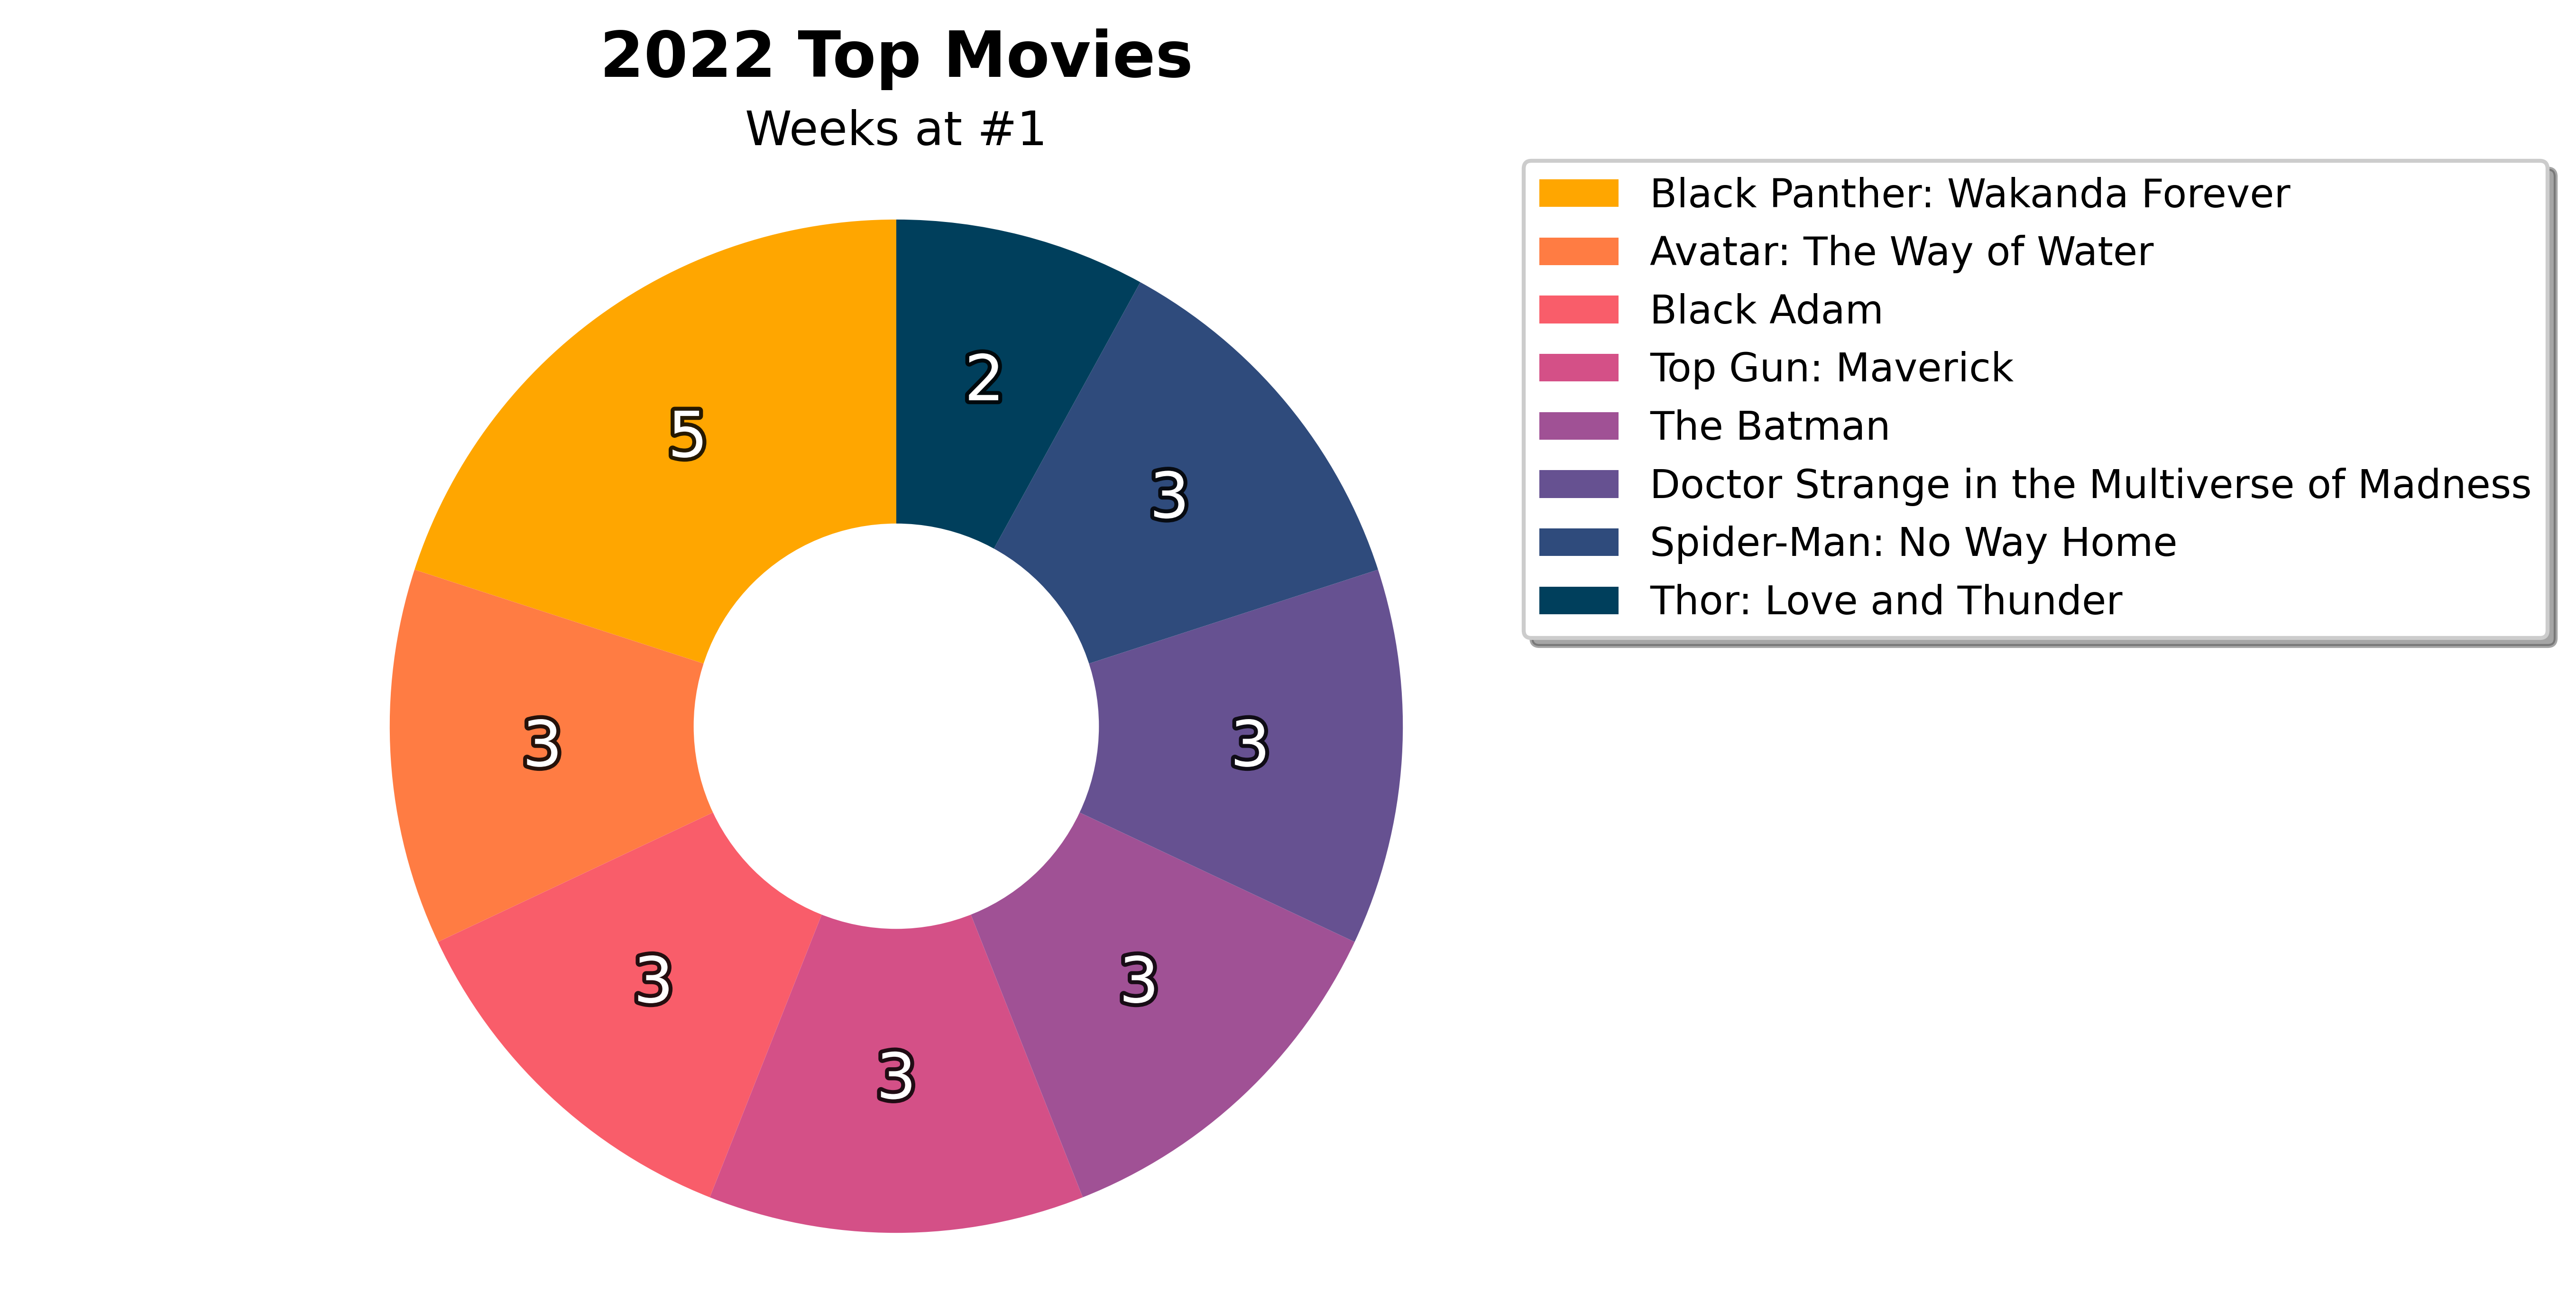

<Figure size 2000x2000 with 0 Axes>

In [17]:
year = 2022
gdd.get_top_movies_for_year_pie_chart(str(year))


# show the png chart (following code only needed to render in Jupyter notebook)
from IPython.display import Image
Image(filename=os.path.join('static','top_8_movies_pie.png'))

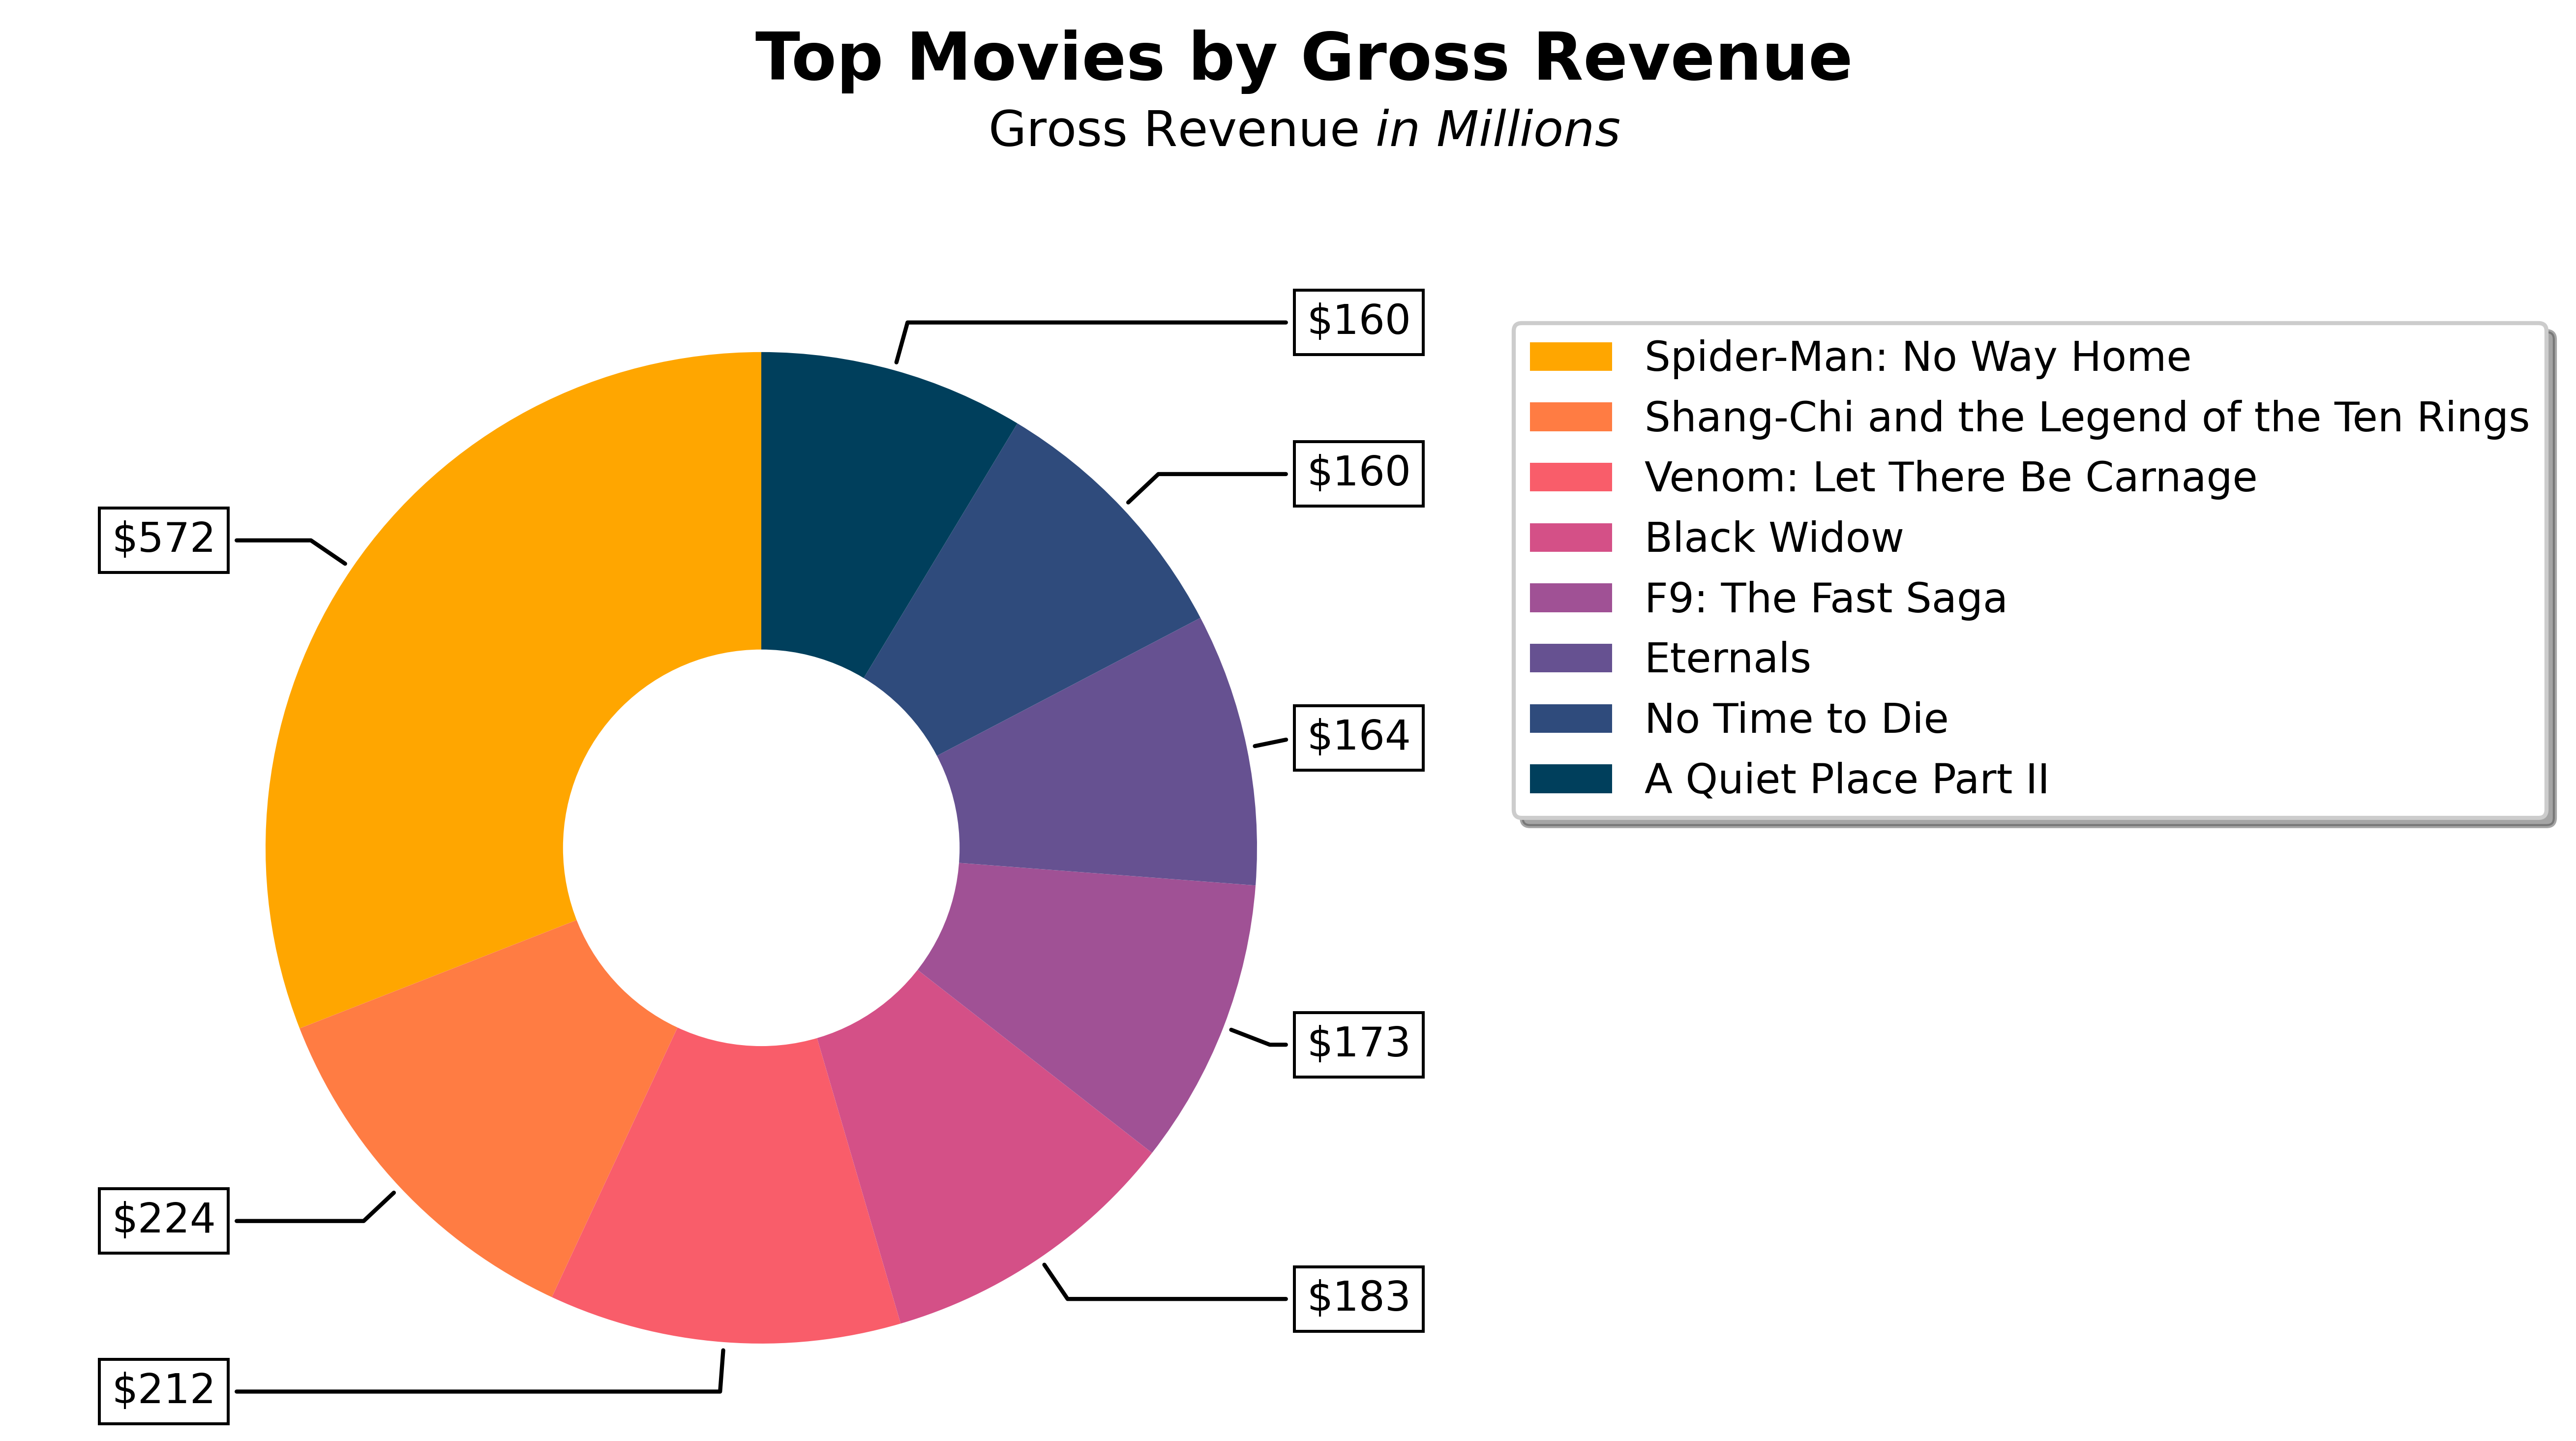

<Figure size 2000x2000 with 0 Axes>

In [5]:
# year = 2022
gdd.run_get_pie_plot("2021")

# show the png chart (following code only needed to render in Jupyter notebook)
from IPython.display import Image
Image(filename=os.path.join('static','top_8_movies_pie.png'))

In [1]:
import get_data as gdd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as pe
import os
import numpy as np
from IPython.display import Image

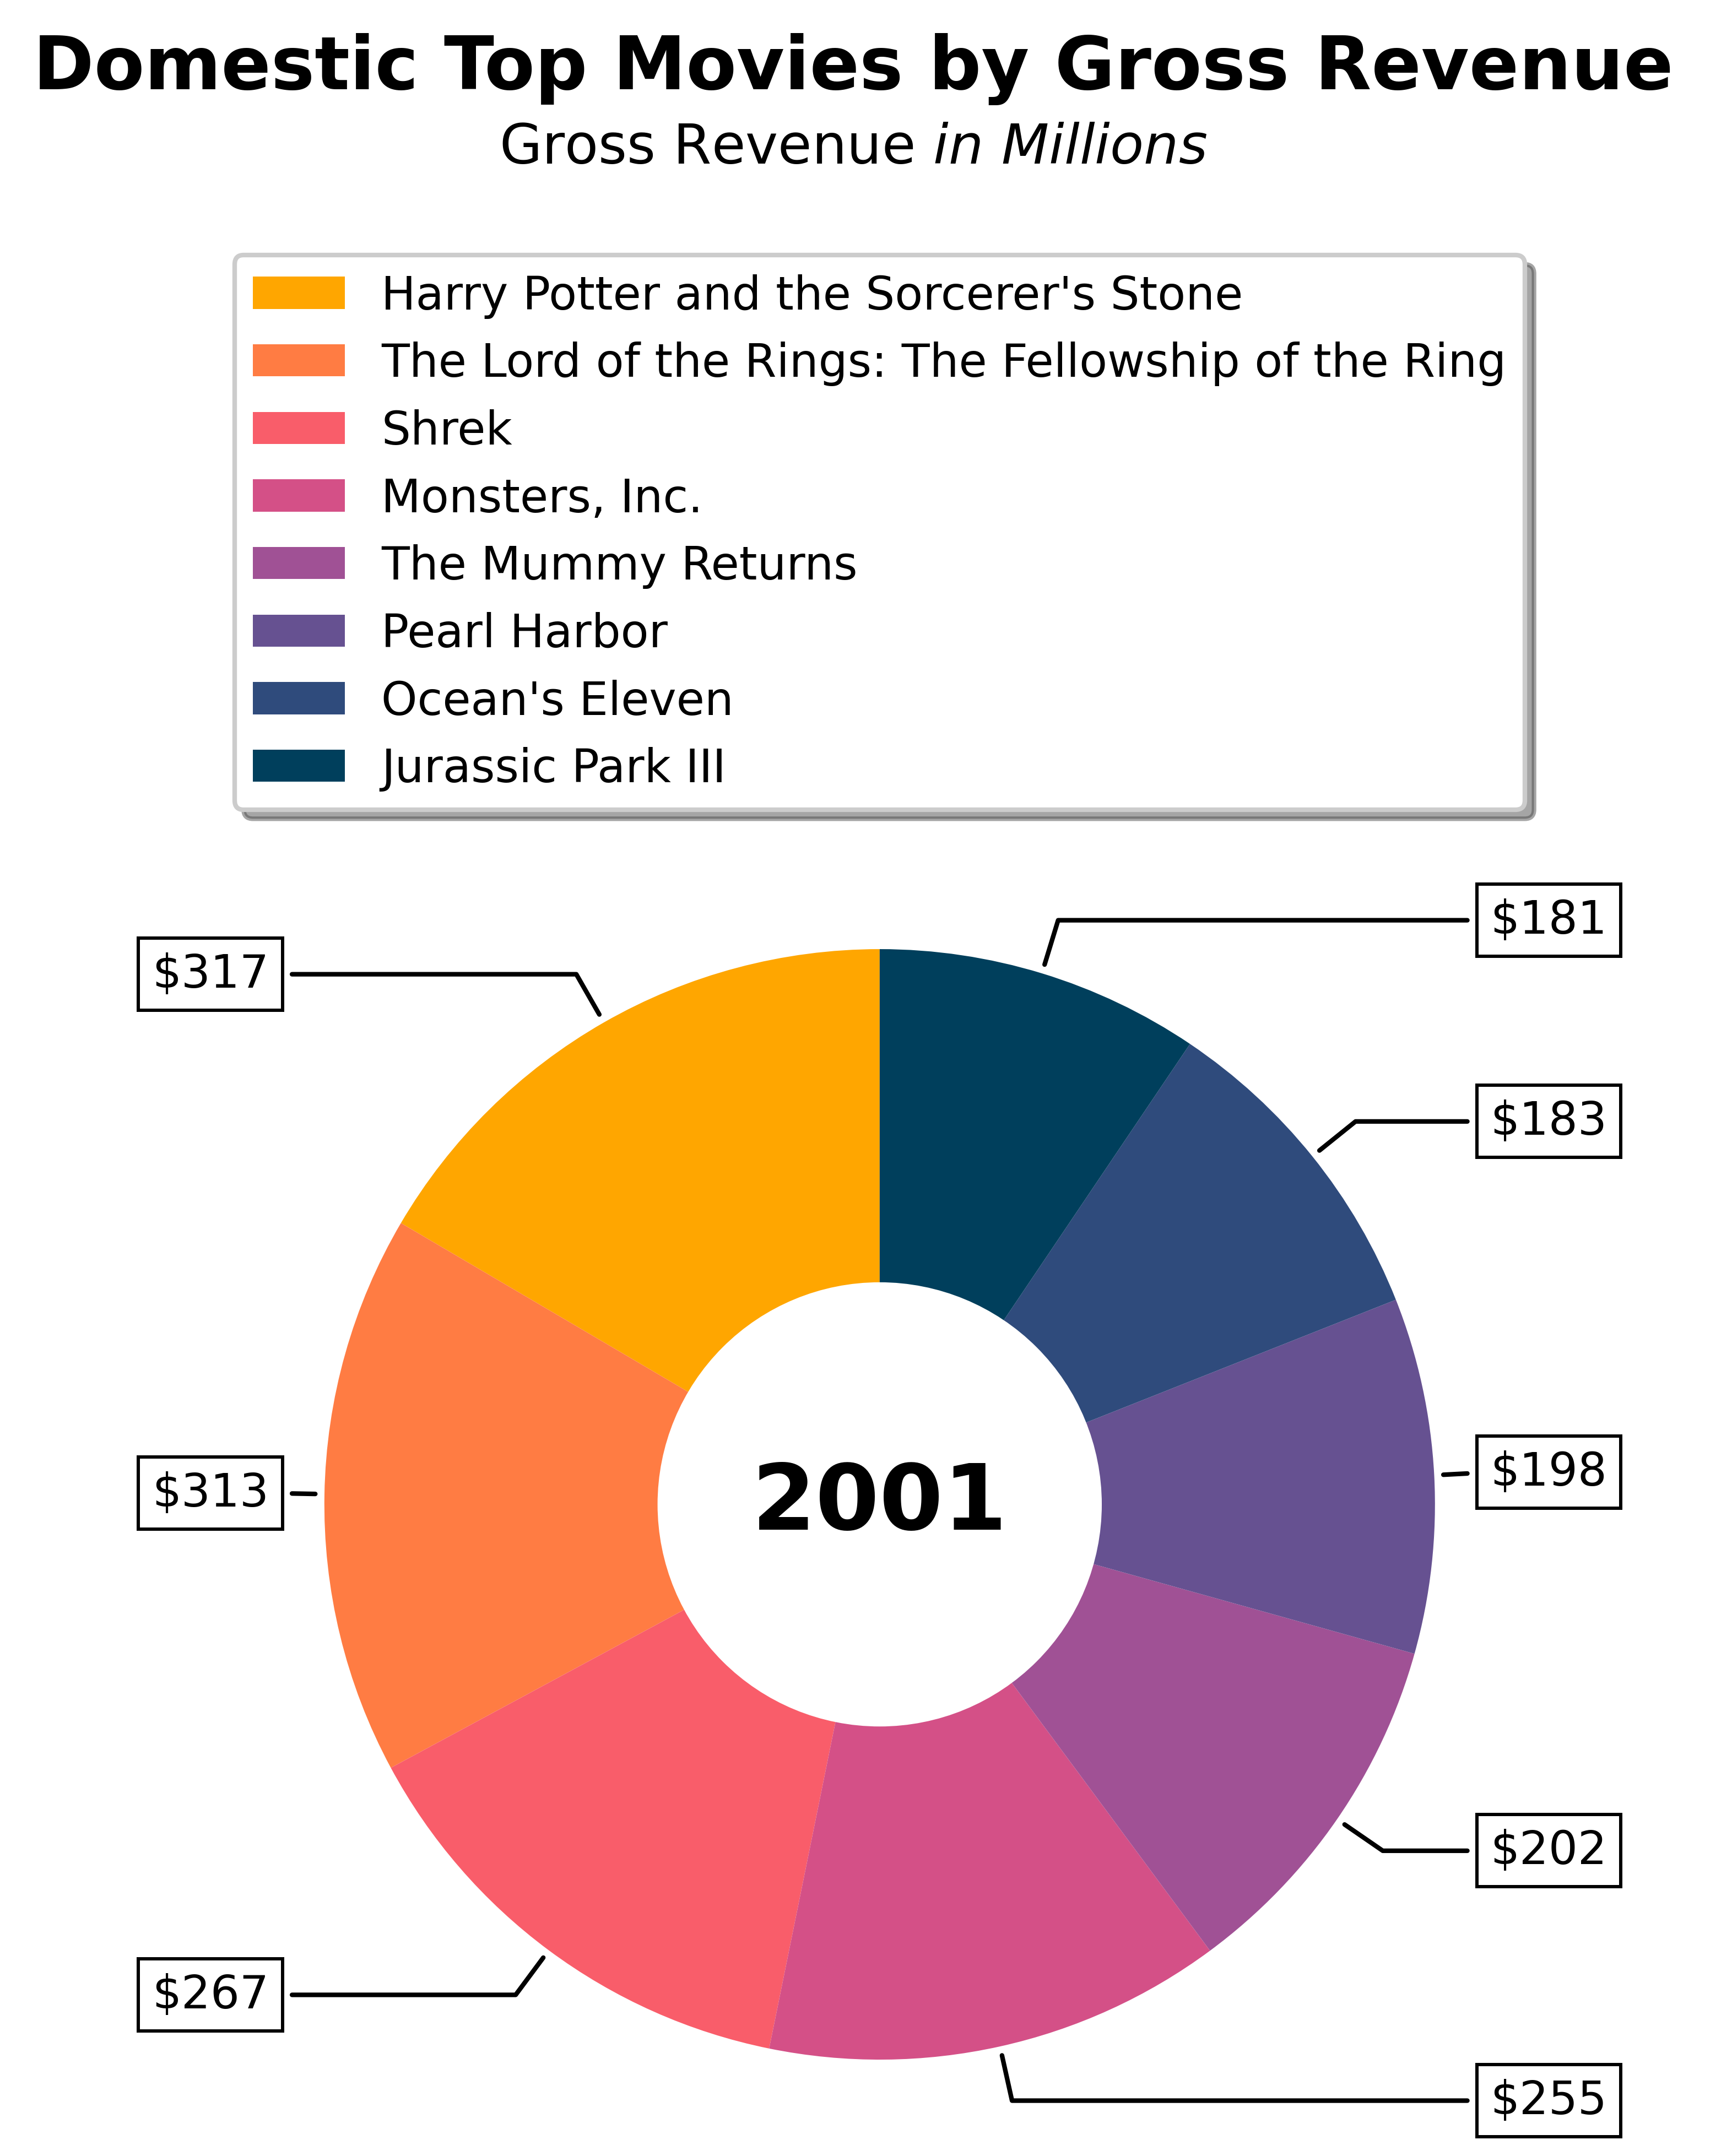

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

In [21]:
year = 
# df = gdd.run_get_pie_plot(str(year))
gdd.run_get_pie_plot(year)

Image(filename=os.path.join('static','top_8_domestic_pie.png'))

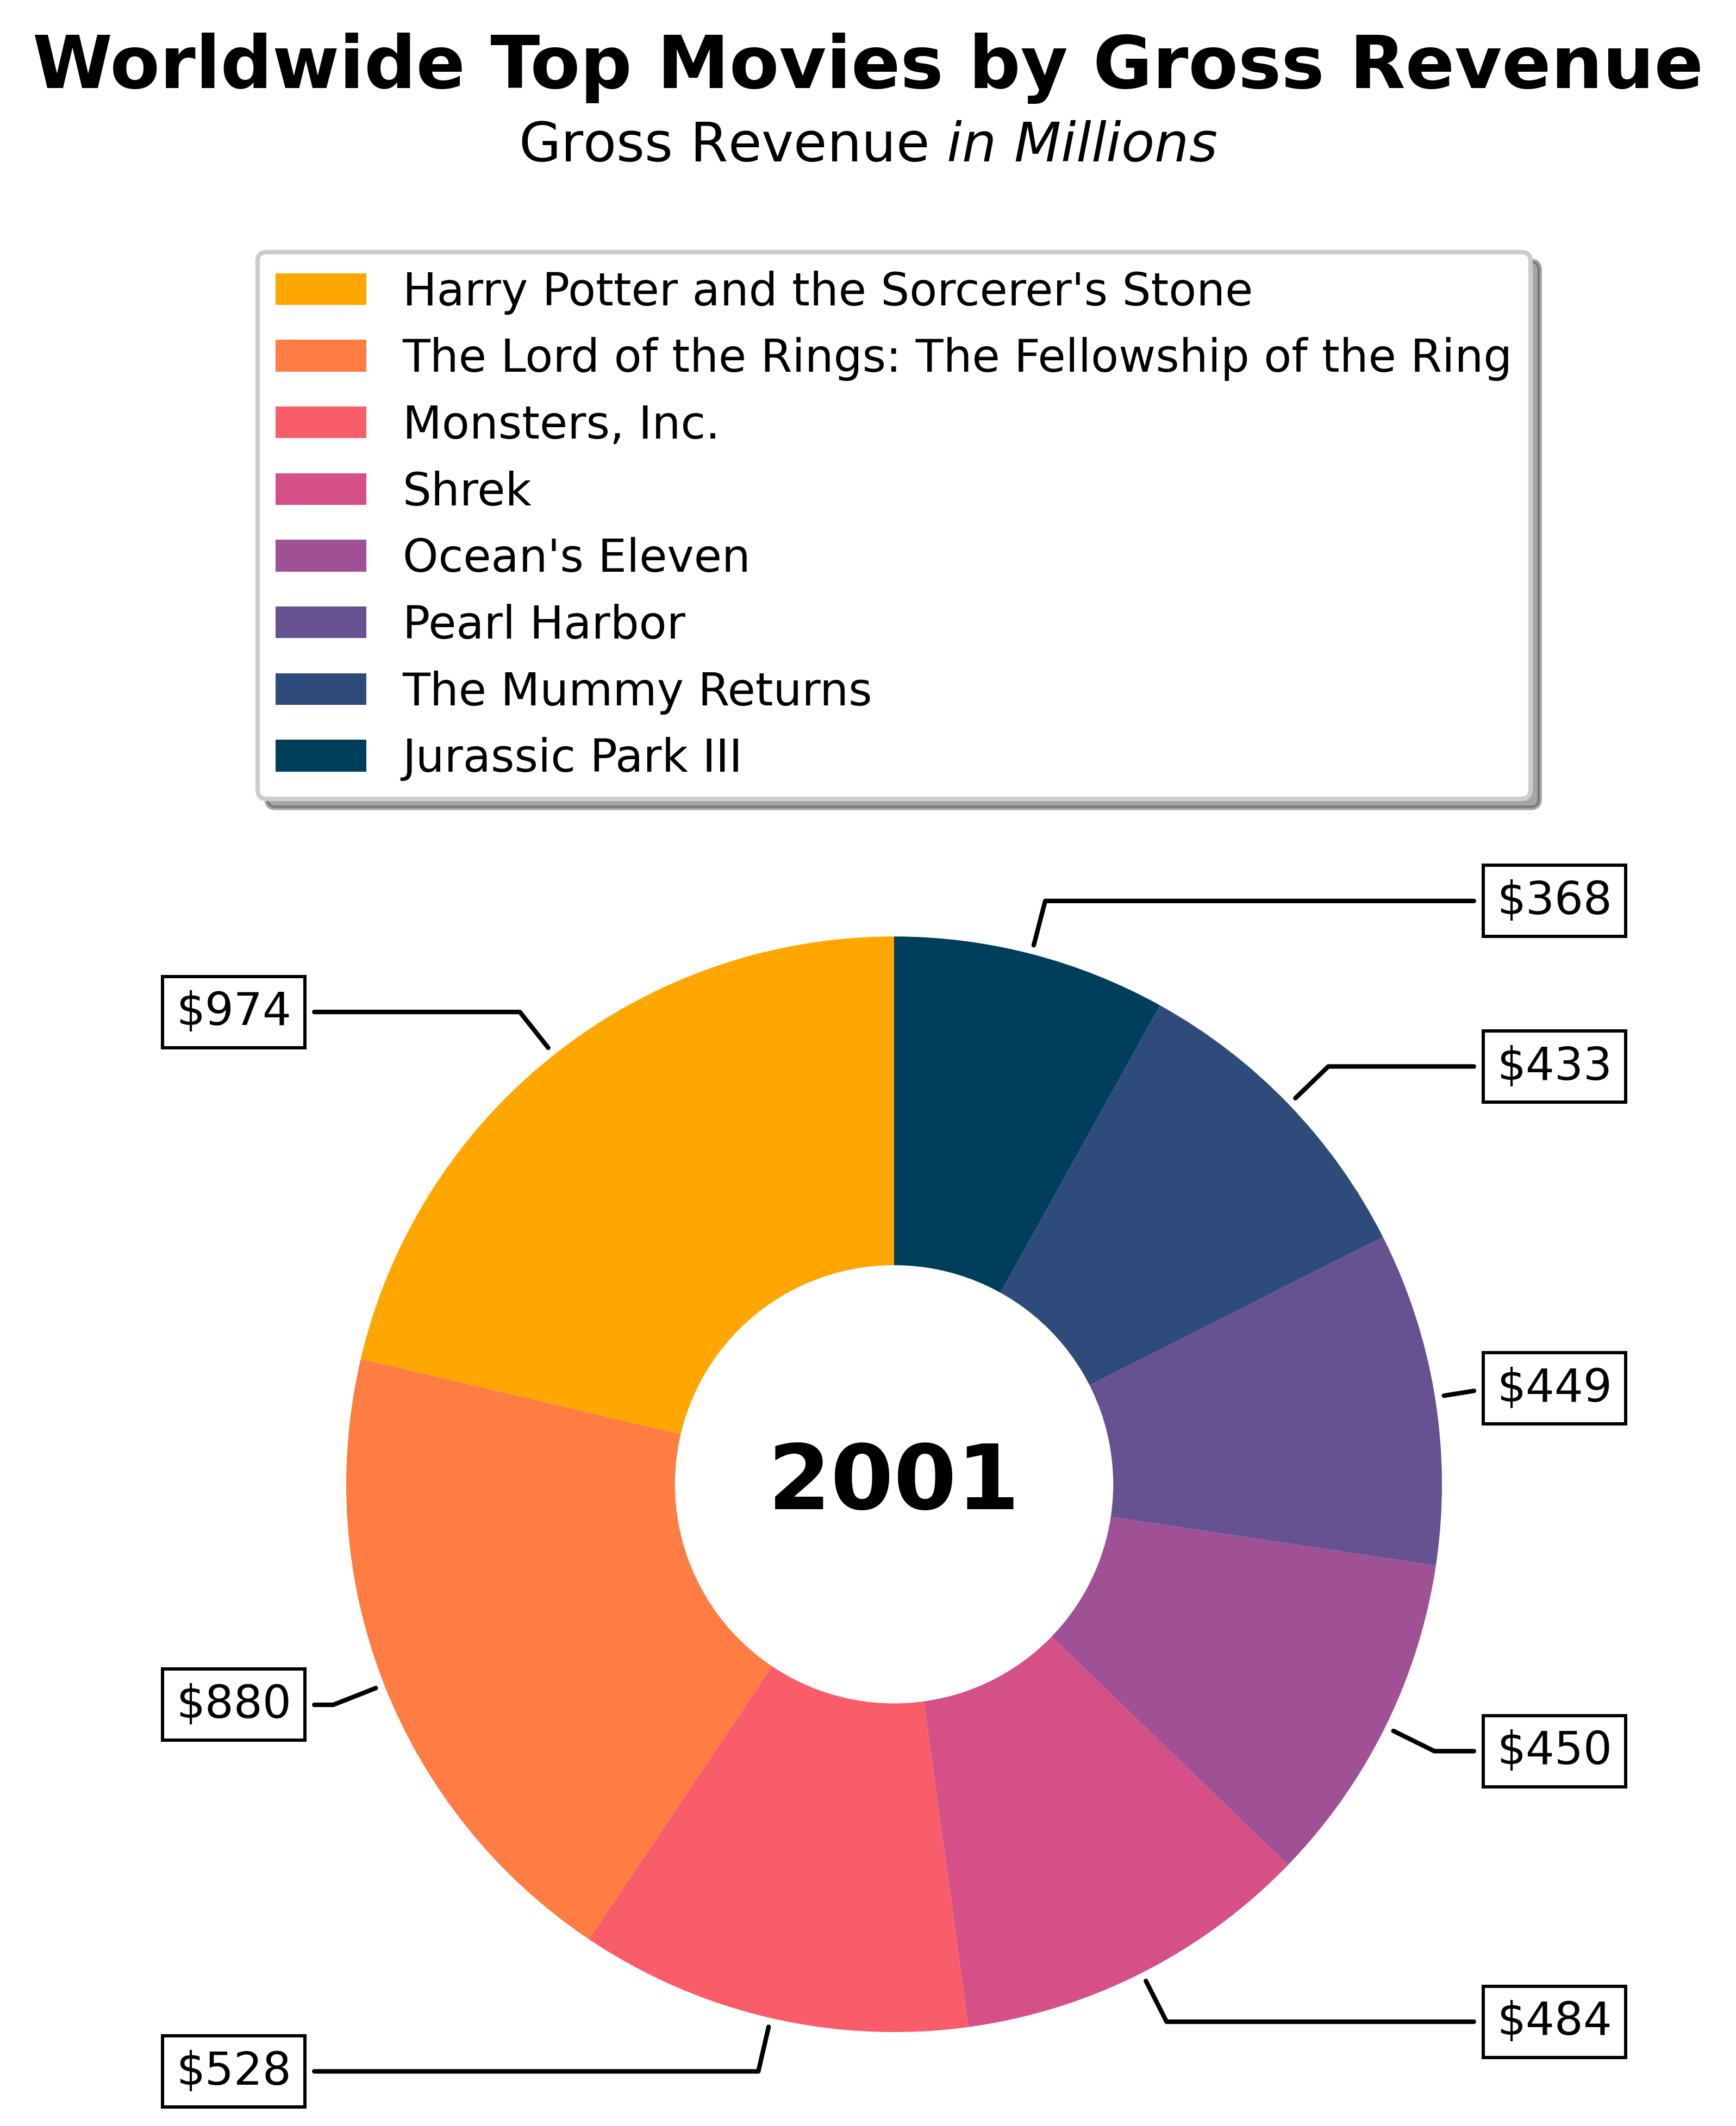

In [22]:
Image(filename=os.path.join('static','top_8_worldwide_pie.png'))

# Archive

In [ ]:
# puts number of weeks at #1 on the pie chart, but the ranking is inaccurate.

def get_top_movies_for_year_pie_chart(year='2023'):
    '''Saves a pie chart showing the top 8 movies for a given year, based on the number of weeks at #1
    param: year (str) - the year to get the top movies for. default is 2023
    return: None
    saves a png file to static/top_8_movies_pie.png'''

    df = gdd.get_weekly_data_for_year(year)
    top_8_movies = df['Number1Release'].value_counts().head(8)

    palette = ['#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087', '#f95d6a', '#ff7c43', '#ffa600']
    palette.reverse()

    labels = top_8_movies.index
    data = top_8_movies

    plt.figure(figsize=(20,20))

    fig1, ax1 = plt.subplots()

    # Plot the pie chart
    ax1.pie(data, colors=palette, autopct=lambda p: '{:.0f}'.format(p * sum(data) / 100), pctdistance=0.7, startangle=90, 
            textprops={'fontsize': 16, 'color': 'white', 'alpha': 1, 'path_effects': [pe.withStroke(linewidth=2, foreground="black", alpha = 0.85)]}, 
            shadow=False)

    # Draw circle
    centre_circle = plt.Circle((0,0),0.4,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    # Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')  

    # Add title and subtitle
    plt.suptitle(year + ' Top Movies', fontsize=16, fontweight='bold', y=0.95)
    plt.title('Weeks at #1', fontsize=12)

    plt.tight_layout()
    plt.legend(labels, loc='upper left', bbox_to_anchor=(0.85, 1.025), shadow=True, ncol=1)
    plt.savefig(os.path.join('static','top_8_movies_pie.png'), dpi=600, bbox_inches='tight')
    plt.close()

    return 

In [2]:
# import the requests and BeautifulSoup modules
import requests
from bs4 import BeautifulSoup
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as pe
import matplotlib
matplotlib.use('qtagg')

def get_top_worldwide_movies_df(year = '2023'):
    
    url = 'https://www.boxofficemojo.com/year/world/'+ str(year) + '/'

    # Send a GET request to the URL
    response = requests.get(url)
    
    # Parse the HTML response
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find the table rows
    table_rows = soup.select('#table div table tr')[1:10]
    
    # Initialize an empty list to store the data
    data = []
    
    # For each row, extract the data and append it to the list
    for row in table_rows:
        rank = row.select('td')[0].text
        release = row.select('td')[1].text
        worldwide = row.select('td')[2].text
        domestic = row.select('td')[3].text
        # percent_domestic = row.select('td')[4].text
        # foreign =  row.select('td')[5].text
        # percent_foreign = row.select('td')[6].text
        
        data.append({
            'Rank': rank,
            'Release': release,
            'worldwide': worldwide,
            'domestic': domestic,
            # 'percent_domestic': percent_domestic,
            # 'foreign': foreign,
            # 'percent_foreign': percent_foreign
        })
    
    # Convert the list of dictionaries to a DataFrame
    df = pd.DataFrame(data)
    
    # Convert the 'Gross' column to an integer
    df['int_worldwide'] = df['worldwide'].str.replace('$', '').str.replace(',', '').astype(np.int64)
    df['readable_worldwide'] = df['int_worldwide'].apply(lambda x: '${:d}'.format(np.int64(x / 1000000)))
    print(df['domestic'])
    df['int_domestic'] = df['domestic'].str.replace('$', '').str.replace(',', '').astype(np.int64)
    df['readable_domestic'] = df['int_domestic'].apply(lambda x: '${:d}'.format(np.int64(x / 1000000)))

    return df


def get_top_movies_pie_chart(df, year, scope):
    '''Saves a pie chart showing the top 8 movies for a given year, based on gross revenue
    param: df (DataFrame) - the DataFrame to get the top movies from
    param: year (str) - the year to get the top movies for
    param: scope (str) - 'domestic' or 'worldwide'
    return: None
    saves a png file to static/top_8_worldwide_pie.png or static/top_8_domestic_pie.png'''

    assert scope in ['domestic', 'worldwide'], "Scope must be 'domestic' or 'worldwide'"

    # Sort the DataFrame by the appropriate column in descending order and select the top 8 movies
    top_8_movies = df.sort_values(f'int_{scope}', ascending=False).head(8).reset_index(drop=True)


    palette = ['#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087', '#f95d6a', '#ff7c43', '#ffa600']
    palette.reverse()
    
    # Use the appropriate column for the pie chart data and labels
    data = top_8_movies[f'int_{scope}']
    labels = top_8_movies[f'readable_{scope}']

    plt.figure(figsize=(20,20))

    fig1, ax1 = plt.subplots()

    plt.text(0,0,year, ha='center', va='center', fontsize=20, fontweight='bold')
    
    # Plot the pie chart without percentages
    wedges, _ = ax1.pie(data, colors=palette, startangle=90, shadow=False)

    # Calculate the angles at which to place the labels
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"),
              bbox=bbox_props, zorder=0, va="center")

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax1.annotate(labels[i], xy=(x, y), xytext=(1.1*np.sign(x), 1.1*y),
                    horizontalalignment=horizontalalignment, **kw)

    # Draw circle
    centre_circle = plt.Circle((0,0),0.4,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    # Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')  

    # Use the 'Release' column for the legend
    legend_labels = top_8_movies['Release']

    # Center the title over the entire image
    # plt.figtext(0.5, 1.4, f'{scope.capitalize()} Top Movies by Gross Revenue', ha='center', va='center', fontsize=16, fontweight='bold')
    plt.figtext(0.5, 1.4, f'{scope.capitalize()}', ha='center', va='center', fontsize=16, fontweight='bold')
    plt.figtext(0.5, 1.35, r'Gross Revenue $\it{in\ Millions}$', ha='center', va='center', fontsize=12)

    # Move the legend up
    plt.legend(legend_labels, loc='lower center', bbox_to_anchor=(.5, -0.6), shadow=True, ncol=1)
    plt.legend(legend_labels, loc='lower center', bbox_to_anchor=(.5, 1.05), shadow=True, ncol=1)

    # Save the image with an appropriate filename
    plt.savefig(os.path.join('static',f'top_8_{scope}_pie.png'), dpi=600, bbox_inches='tight', transparent=True)
    plt.close()

    return

def run_get_pie_plot(year=2023):
    year = str(year)
    scopes = ['domestic', 'worldwide']
    df = get_top_worldwide_movies_df(year)
    get_top_movies_pie_chart(df, year, scopes[0])
    get_top_movies_pie_chart(df, year, scopes[1])
    return 
run_get_pie_plot('2021')


ValueError: invalid literal for int() with base 10: '-'